In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,mean_squared_error,confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
#from sklearn_pandas import CategoricalImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import FeatureUnion

In [7]:
#df=pd.read_csv('https://raw.githubusercontent.com/eric-bunch/boston_housing/master/boston.csv')
#df.to_csv('boston_housing_prices.csv')
df=pd.read_csv('boston_housing_prices.csv')
print(df.columns)

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV'],
      dtype='object')


In [8]:
features = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'PTRATIO',
    'B',
    'LSTAT'
]

RMSE on train data:  1296.6727099113673
RMSE on test data:  4105.278080658933


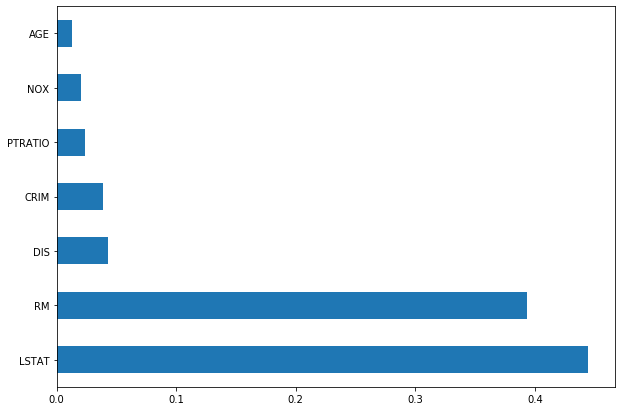

In [9]:
X=df[features]
y=df['MDEV'].astype(float)*1000
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.25,random_state=0)

model_RFR = RandomForestRegressor(max_depth=10, random_state=42)
# fit the model with the training data
model_RFR.fit(train_x, train_y)
# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)
# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [10]:


rf_pipeline = Pipeline[("st_scaler",StandardScaler()),
                       ("rf_model",RandomForestRegressor())]

TypeError: 'ABCMeta' object is not subscriptable

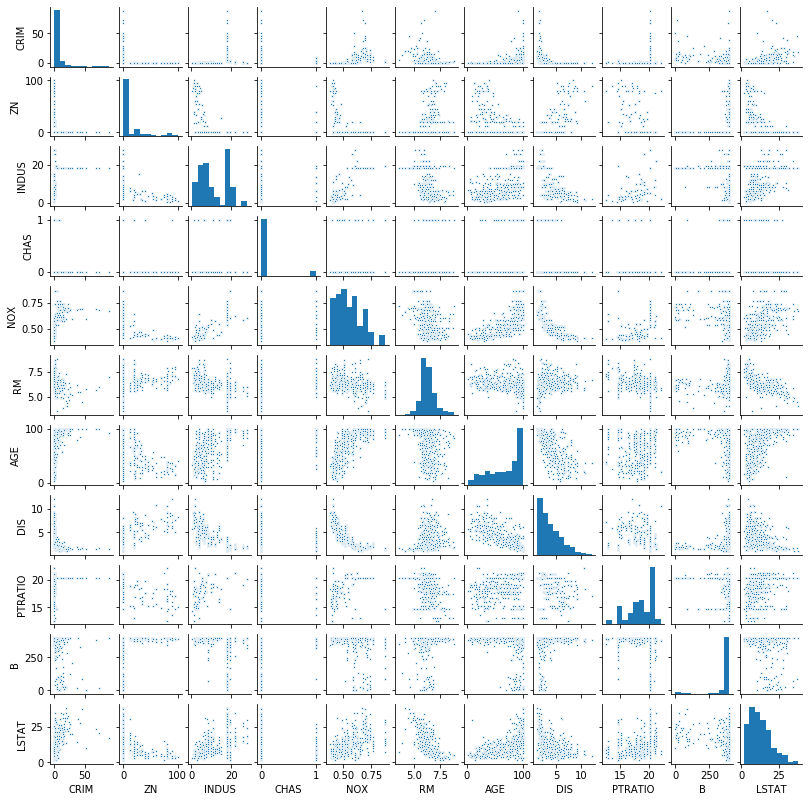

In [24]:
sns.pairplot(
    data=df,
    vars=features,
    size=1,
    plot_kws={'s': 5}
)
plt.show()